In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from backtest_functions_v2 import *

In [12]:
df = pd.read_parquet("../data/full_dataset_feature_engineering_v3.parquet")

Overall Annual Return: 268.65%
Overall Annual Sharpe Ratio: 2.6714
Maximum Drawdown: -27.91 %
Alpha: 1.6146
Beta: 0.5277

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2024       2.686545    0.543677     0.527672      0.961149       2.671353


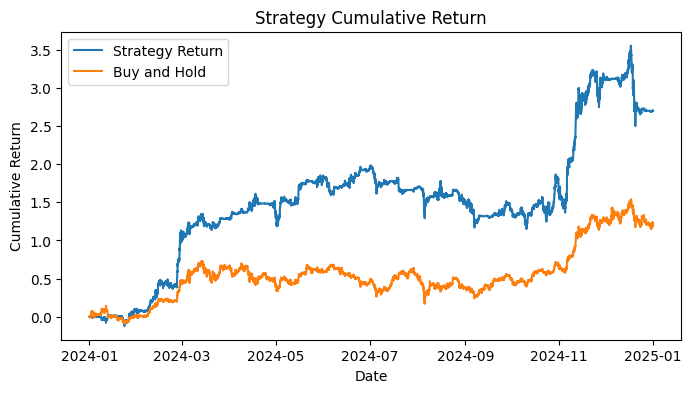

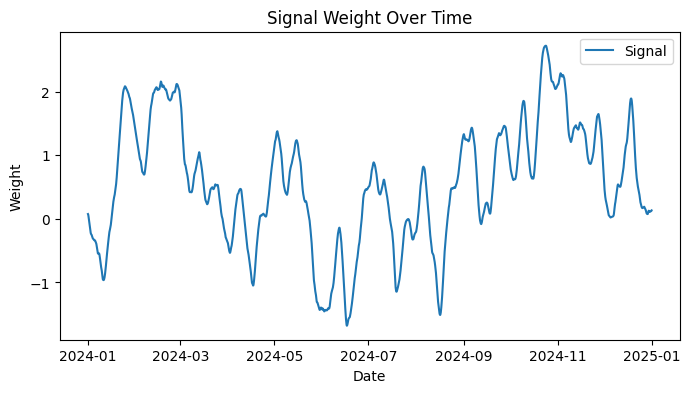

In [13]:
# signal smoothing
df['signal'] = df['tanalysis_absa_ewm_100h'].ewm(span=100, min_periods=1).mean()

# signal scaling
scaler = StandardScaler()
df['signal'] = scaler.fit_transform(df[['signal']])

df = df[df.index >= '2024-01-01']
df = df[df.index < '2025-01-01']

run_backtest(df, freq='h')